<a href="https://colab.research.google.com/github/Hiji1023/mini_project/blob/main/pima_diabetes_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. 드라이브 마운트**#

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**2. 라이브러리 로드**#


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**3. 데이터셋 로드**#

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/boostcourse/data/diabetes.csv")
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#**4. 학습, 예측 데이터셋 나누기**#



In [9]:
# 8:2 비율로 구하기 위해 전체 데이터 행에서 80%위치에 해당하는 값을 구해 split_conut 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [10]:
# train, test로 슬라이싱 통해 데이터를 나눕니다.
train = df[:split_count].copy()
train.shape

(614, 9)

In [11]:
test = df[split_count:].copy()
test.shape

(154, 9)

#**5. 학습, 예측에 사용할 컬럼**#


In [23]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

#**6. 정답값이자 예측해야 될 값**#



In [27]:
# label_name 변수에 예축할 컬럼의 이름을 담습니다.
label_name = train.columns[-1]
label_name

'Outcome'

#**7. 학습, 예측 데이터셋 만들기**#

In [31]:
# 학습 세트 만들기 - 시험의 기출문제
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [34]:
# 정답값을 만들기 - 기출문제의 정답
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [36]:
# 예측에 사용할 데이터셋 만들기 - 실전 시험문제
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


In [37]:
# 예측의 정답값 - 실전 시험문제의 정답
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

#**8. 머신러닝 알고리즘 가져오기**#

In [40]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

#**9. 학습(훈련)**#

In [41]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

#**10. 예측**#

In [46]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1])

#**11. 트리알고리즘 분석하기**#

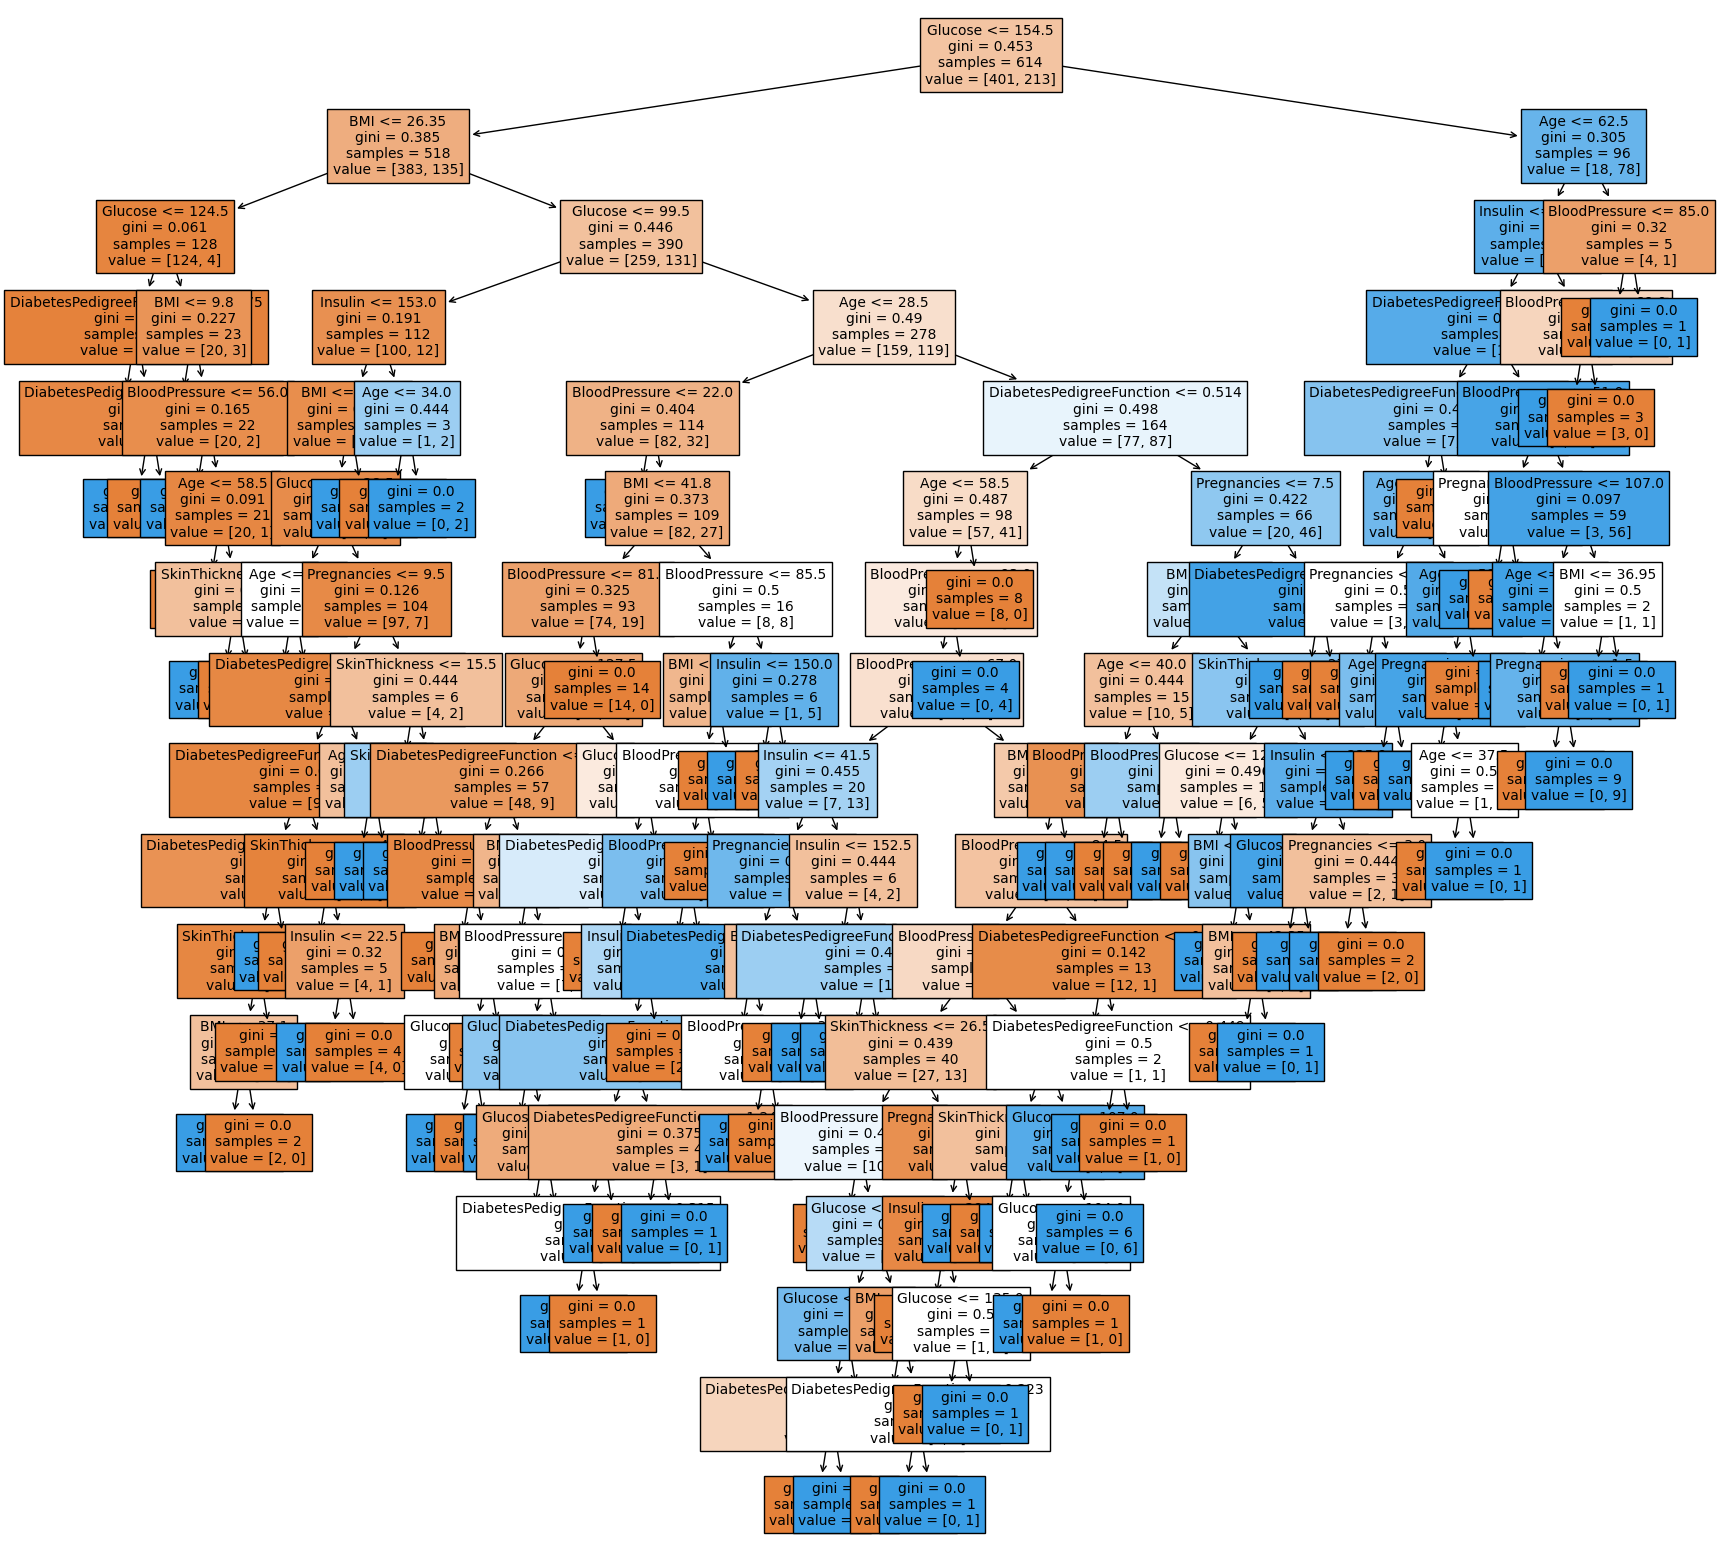

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names = feature_names,
                 filled=True,
                 fontsize = 10)

In [53]:
# 피처의 중요도 추출하기
model.feature_importances_

array([0.05682431, 0.32554402, 0.1496592 , 0.04312795, 0.05360657,
       0.14291973, 0.11984996, 0.10846826])

<Axes: >

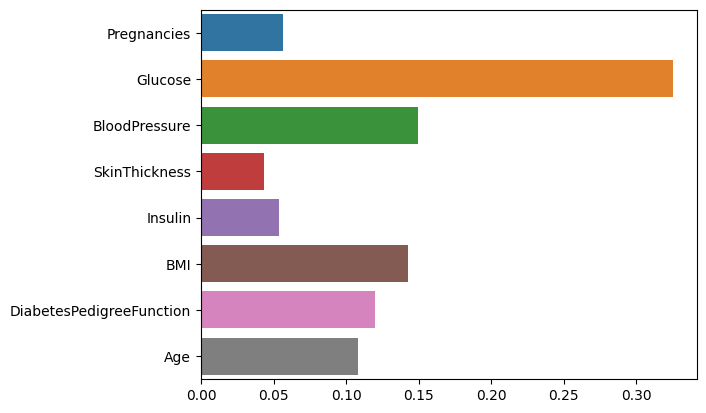

In [54]:
# 피처의 중요도 시각화하기
sns.barplot(x=model.feature_importances_, y = feature_names)

#**12. 정확도(Accuracy) 예측하기**#

In [60]:
# 실제값-예측값 = 0 -> 같은 값, = 1 이면 다르게 예측한 값

diff_count = abs(y_test - y_predict).sum()
diff_count

42

In [62]:
# 예측의 정확도 구하기

(len(y_test) - diff_count) / len(y_test) * 100

72.72727272727273

In [64]:
# 구현된 알고리즘 가져와 사용
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)*100

72.72727272727273

In [66]:
# model의 score로 점수계산
model.score(X_test, y_test) *100

72.72727272727273